# Data Analysis Report for Sussex Budget Production

This research suggests a film genre that might be profitable for SussexBudgetProductions House based on past data.
This research suggests a film genre that would make revenue and help Sussex Budget Production House progress, based on past data.

In [516]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pointbiserialr

# Ignore Caution Signs
import warnings
warnings.filterwarnings('ignore')

# Load the movie metadata file (upload 'movie_metadata.csv' to your Colab environment)
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file into a DataFrame
df=pd.read_csv("drive/MyDrive/movie_metadata.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [517]:
# myfile = 'movie_metadata.csv'
# #read the movie metadata file into a dataframe in pandas.
# df = pd.read_csv(myfile,index_col=None)
# df.info()

### Data Cleaning

In [518]:
#display dataframe
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [519]:
movie_ds = df.copy(deep=True)

In [520]:
#displays 1st 5 rows
movie_ds.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [521]:
#displays last 5 rows
movie_ds.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [522]:
#displays the shape of data
movie_ds.shape

(5043, 28)

In [523]:
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

After careful inspection, we found that the dataset has 5043 entries, with 28 columns. There are many NaNs in the dataset which is unfavourable to our research. As a result, we need to do perform cleaning.

In [524]:
print(f"Any missing value?: {movie_ds.isnull().values.any()}")

Any missing value?: True


In [525]:
movie_ds.isna()
movie_ds.isna().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

<Axes: >

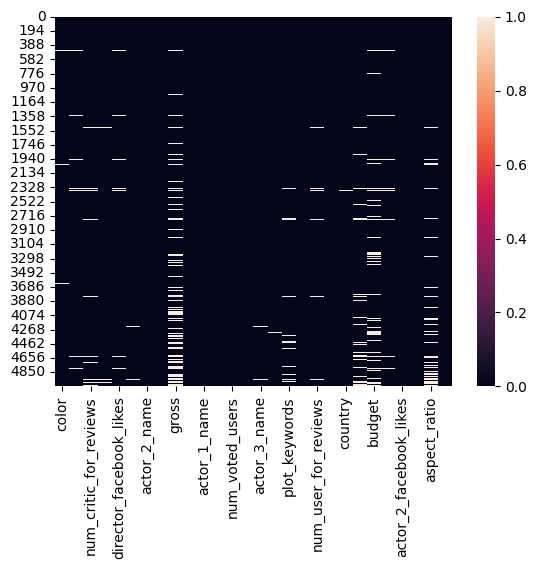

In [526]:
sns.heatmap(movie_ds.isnull())

In [527]:
movie_ds = movie_ds.dropna()
movie_ds.reset_index(drop=True,inplace=True)
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

Now let's search for any duplicate values.

In [528]:
print(f"Any duplicate values?: {movie_ds.duplicated().any()}")
sum(movie_ds.duplicated())

Any duplicate values?: True


33

In [529]:
movie_ds.drop_duplicates(subset = None, keep="first",inplace=True,ignore_index=True)
movie_ds

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
3719,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
3720,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3721,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [530]:
movie_ds.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03,3723.000000,3723.000000,3723.000000,3.723000e+03,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000
mean,167.040559,110.263497,809.864357,765.010207,7743.335751,5.248034e+07,1.055543e+05,11494.966694,1.376041,335.897663,4.623049e+07,2002.965351,2009.926403,6.465673,2.110682,9299.497717
std,123.345135,22.678325,3076.624412,1868.841589,15557.953218,6.980333e+07,1.515651e+05,19113.274232,2.045134,411.078619,2.269511e+08,9.892253,4531.151446,1.053644,0.353879,21426.654643
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,744.500000,8.124330e+06,1.959850e+04,1907.000000,0.000000,109.000000,1.000000e+07,1999.000000,383.500000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,63.000000,436.000000,1000.000000,3.005003e+07,5.397700e+04,4050.000000,1.000000,209.000000,2.500000e+07,2004.000000,683.000000,6.600000,2.350000,226.000000
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.690181e+07,1.285240e+05,16232.500000,2.000000,398.000000,5.000000e+07,2010.000000,975.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


### Data Wrangling

In [531]:
movie_ds.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [532]:
columns ={"director_facebook_likes":"director_fb_likes",
          "actor_3_facebook_likes":"actor_3_fb_likes",
          "actor_1_facebook_likes":"actor_1_fb_likes",
          "cast_total_facebook_likes":"cast_total_fb_likes",
          "facenumber_in_poster":"facenum_in_poster",
          "actor_2_facebook_likes":"actor_2_fb_likes",
          "movie_facebook_likes":"movie_fb_likes"
         }
movie_ds.rename(columns=columns,inplace=True)

In [533]:
movie_ds=movie_ds.astype({"title_year":"int64","num_critic_for_reviews":"int64","director_fb_likes":"int64","actor_3_fb_likes":"int64","actor_1_fb_likes":"int64","facenum_in_poster":"int64","num_user_for_reviews":"int64","actor_2_fb_likes":"int64"})
movie_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   3723 non-null   object 
 1   director_name           3723 non-null   object 
 2   num_critic_for_reviews  3723 non-null   int64  
 3   duration                3723 non-null   float64
 4   director_fb_likes       3723 non-null   int64  
 5   actor_3_fb_likes        3723 non-null   int64  
 6   actor_2_name            3723 non-null   object 
 7   actor_1_fb_likes        3723 non-null   int64  
 8   gross                   3723 non-null   float64
 9   genres                  3723 non-null   object 
 10  actor_1_name            3723 non-null   object 
 11  movie_title             3723 non-null   object 
 12  num_voted_users         3723 non-null   int64  
 13  cast_total_fb_likes     3723 non-null   int64  
 14  actor_3_name            3723 non-null   

Lets create profit and profit_percent column

In [534]:
#Create a variable=profit
#profit=gross-budget
#to easy to understand we will take profit in percentage
movie_ds['profit'] = movie_ds['gross'] - movie_ds['budget']
movie_ds['profit_percent'] = (movie_ds['profit']/movie_ds['gross'])*100
movie_ds

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,profit,profit_percent
0,Color,James Cameron,723,178.0,0,855,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009,936,7.9,1.78,33000,523505847.0,68.836532
1,Color,Gore Verbinski,302,169.0,563,1000,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007,5000,7.1,2.35,0,9404152.0,3.039439
2,Color,Sam Mendes,602,148.0,0,161,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015,393,6.8,2.35,85000,-44925825.0,-22.454585
3,Color,Christopher Nolan,813,164.0,22000,23000,Christian Bale,27000,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012,23000,8.5,2.35,164000,198130642.0,44.212697
4,Color,Andrew Stanton,462,132.0,475,530,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012,632,6.6,2.35,24000,-190641321.0,-260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Color,Olivier Assayas,81,110.0,107,45,Béatrice Dalle,576,136007.0,Drama|Music|Romance,...,France,R,4500.0,2004,133,6.9,2.35,171,131507.0,96.691347
3719,Color,Jafar Panahi,64,90.0,397,0,Nargess Mamizadeh,5,673780.0,Drama,...,Iran,Not Rated,10000.0,2000,0,7.5,1.85,697,663780.0,98.515836
3720,Color,Shane Carruth,143,77.0,291,8,David Sullivan,291,424760.0,Drama|Sci-Fi|Thriller,...,USA,PG-13,7000.0,2004,45,7.0,1.85,19000,417760.0,98.352011
3721,Color,Robert Rodriguez,56,81.0,0,6,Peter Marquardt,121,2040920.0,Action|Crime|Drama|Romance|Thriller,...,USA,R,7000.0,1992,20,6.9,1.37,0,2033920.0,99.657017


In [535]:
movie_ds.describe()

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenum_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,profit,profit_percent
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03,3723.000000,3723.000000,3723.000000,3.723000e+03,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03
mean,167.040559,110.263497,809.864357,765.010207,7743.335751,5.248034e+07,1.055543e+05,11494.966694,1.376041,335.897663,4.623049e+07,2002.965351,2009.926403,6.465673,2.110682,9299.497717,6.249847e+06,-4.952528e+03
std,123.345135,22.678325,3076.624412,1868.841589,15557.953218,6.980333e+07,1.515651e+05,19113.274232,2.045134,411.078619,2.269511e+08,9.892253,4531.151446,1.053644,0.353879,21426.654643,2.307904e+08,1.027804e+05
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000,-1.221330e+10,-5.555456e+06
25%,77.000000,96.000000,11.000000,194.000000,744.500000,8.124330e+06,1.959850e+04,1907.000000,0.000000,109.000000,1.000000e+07,1999.000000,383.500000,5.900000,1.850000,0.000000,-1.045723e+07,-1.068332e+02
50%,138.000000,106.000000,63.000000,436.000000,1000.000000,3.005003e+07,5.397700e+04,4050.000000,1.000000,209.000000,2.500000e+07,2004.000000,683.000000,6.600000,2.350000,226.000000,1.590010e+06,9.365069e+00
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.690181e+07,1.285240e+05,16232.500000,2.000000,398.000000,5.000000e+07,2010.000000,975.000000,7.200000,2.350000,11000.000000,2.575094e+07,5.533943e+01
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000,5.235058e+08,9.998610e+01


Sorting the profit column in descending order

### EDA Analysis
The profit of the movies is the main focus of this dataset. Our natural tendency is to look for feature values that provide the highest profit. On the other hand, we can approximate it by examining the correlation matrix and using the features that display average correlation determined by the profit levels.

In [536]:
# Calculate Spearman correlation matrix
corr = movie_ds.corr(method="spearman")

# Define the columns
cols = movie_ds.columns

# Identify numerical and categorical columns
numerical_cols = movie_ds.select_dtypes(include=np.number).columns
categorical_cols = movie_ds.select_dtypes(exclude=np.number).columns

# Set the target column for correlation analysis
target_column = "profit"

# Iterate through all columns (except the target column)
for other_column in cols[:-2]:
    # Attempt to calculate correlation
    correlation, _ = spearmanr(movie_ds[target_column], movie_ds[other_column])

    # Categorize the correlation strength
    if np.abs(correlation) < 0.3:
        strength = "Negligible"
    elif 0.3 <= np.abs(correlation) < 0.5:
        strength = "Low"
    elif 0.5 <= np.abs(correlation) < 0.7:
        strength = "Moderate"
    elif 0.7 <= np.abs(correlation) < 0.9:
        strength = "High"
    else:
        strength = "Very high"

    # Print the correlation information
    print(f"{strength} correlation between '{target_column}' and '{other_column}': {correlation:.2f}")

Negligible correlation between 'profit' and 'color': 0.01
Negligible correlation between 'profit' and 'director_name': -0.02
Negligible correlation between 'profit' and 'num_critic_for_reviews': 0.16
Negligible correlation between 'profit' and 'duration': 0.01
Negligible correlation between 'profit' and 'director_fb_likes': 0.05
Negligible correlation between 'profit' and 'actor_3_fb_likes': 0.12
Negligible correlation between 'profit' and 'actor_2_name': -0.02
Negligible correlation between 'profit' and 'actor_1_fb_likes': 0.06
Moderate correlation between 'profit' and 'gross': 0.61
Negligible correlation between 'profit' and 'genres': 0.07
Negligible correlation between 'profit' and 'actor_1_name': 0.00
Negligible correlation between 'profit' and 'movie_title': -0.02
Low correlation between 'profit' and 'num_voted_users': 0.38
Negligible correlation between 'profit' and 'cast_total_fb_likes': 0.09
Negligible correlation between 'profit' and 'actor_3_name': -0.04
Negligible correlatio

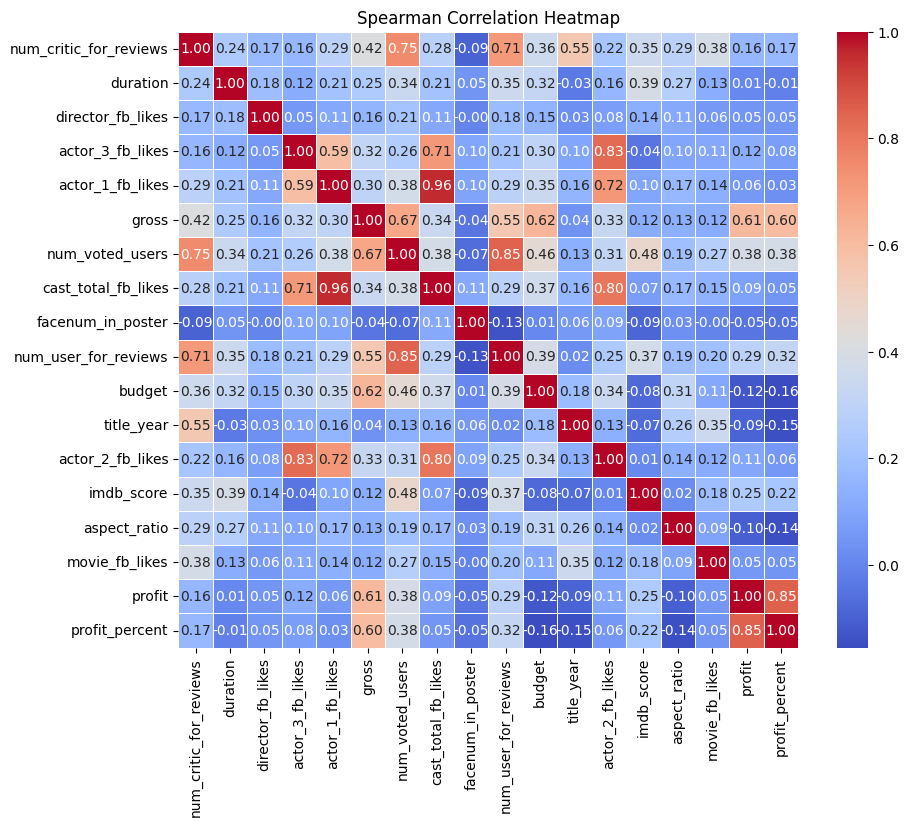

In [537]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

We see that gross, num_voted_users, num_user_for_reviews have a moderate and low correlation with profit.

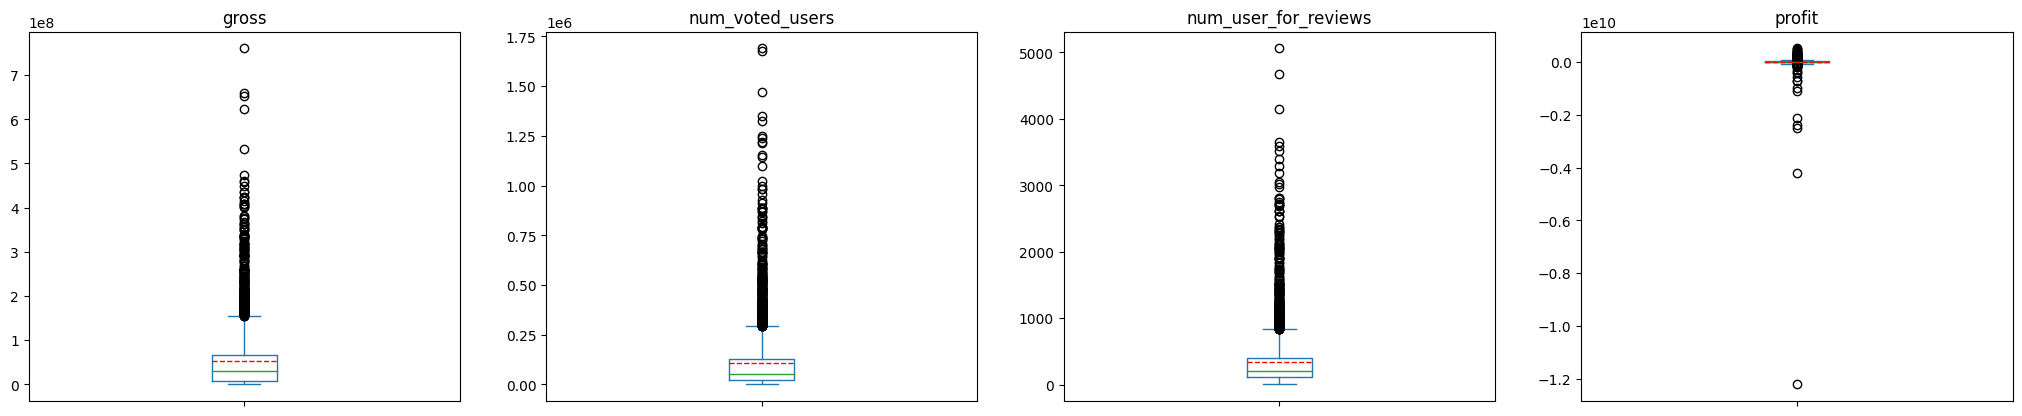

In [538]:
fig, axes = plt.subplots(nrows = 1, ncols = 4)

movie_cols = ["gross","num_voted_users","num_user_for_reviews","profit"]

for col, ax in zip(movie_cols,axes.flat):
    movie_ds.plot(kind="box",ax=ax,y=col,meanline=True,showmeans=True,meanprops={"color":"r"})
    ax.set_xticklabels([""])
    ax.set_title(col)

fig.set_figwidth(fig.get_figwidth() * 4)

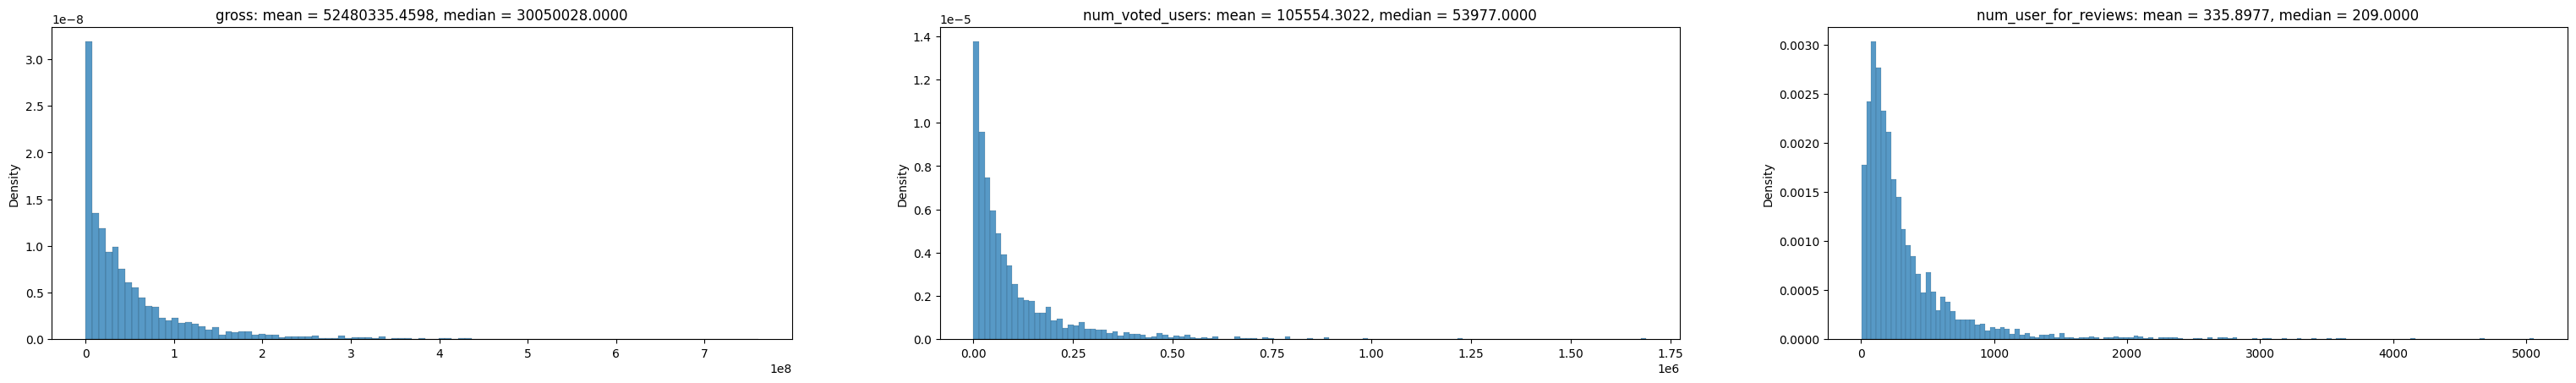

In [539]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
want_kde = False

for col, ax in zip(movie_cols[:-1],axes.flat):
    sns.histplot(data=movie_ds,x=col,ax=ax, stat="density")
    if want_kde:
        sns.kdeplot(data=movie_ds,x=col,ax=ax,color="k", linewidth=2)
    mean = movie_ds[col].mean()
    median = movie_ds[col].median()
    ax.set_title(f"{col}: mean = {mean:.4f}, median = {median:.4f}")
    ax.set_xlabel("")

profit, counts = np.unique(movie_ds["profit"],return_counts=True)

fig.set_figwidth(fig.get_figwidth() * 6)

By the graph we can see that they arent gaussian

In [540]:
# Change the budget and gross units to millions for easy analysis at later stage.
movie_ds['budget_million'] = movie_ds['budget']/1000000
movie_ds['gross_million'] = movie_ds['gross']/1000000

# Sort the data frame in descending order to profit percent in movie_data set
movie_ds = movie_ds.sort_values(by = 'profit_percent', ascending = False)
movie_ds

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes,profit,profit_percent,budget_million,gross_million
3649,Color,Oren Peli,409,84.0,110,21,Ashley Palmer,189,107917283.0,Horror,...,1.500000e+04,2007,109,6.3,1.85,12000,1.079023e+08,9.998610e+01,0.015000,107.917283
3652,Color,Jonathan Caouette,72,88.0,20,0,Jonathan Caouette,58,592014.0,Biography|Documentary,...,2.180000e+02,2003,20,7.2,1.37,754,5.917960e+05,9.996318e+01,0.000218,0.592014
3611,Black and White,Daniel Myrick,360,81.0,19,39,Joshua Leonard,170,140530114.0,Horror,...,6.000000e+04,1999,170,6.4,1.33,0,1.404701e+08,9.995730e+01,0.060000,140.530114
3709,Color,Edward Burns,36,98.0,0,73,Michael McGlone,138,10246600.0,Comedy|Drama|Romance,...,2.500000e+04,1995,111,6.6,1.85,265,1.022160e+07,9.975602e+01,0.025000,10.246600
3696,Color,Tobe Hooper,277,88.0,365,177,Edwin Neal,383,30859000.0,Horror|Thriller,...,8.353200e+04,1974,371,7.5,1.85,0,3.077547e+07,9.972931e+01,0.083532,30.859000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,Color,Joon-ho Bong,363,110.0,584,74,Kang-ho Song,629,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,1.221550e+10,2006,398,7.0,1.85,7000,-1.221330e+10,-5.547939e+05,12215.500000,2.201412
311,Color,Yimou Zhang,136,146.0,611,28,Ni Ni,23000,9213.0,Drama|History|Romance|War,...,9.400000e+07,2011,196,7.6,2.35,13000,-9.399079e+07,-1.020197e+06,94.000000,0.009213
2675,Color,Lajos Koltai,73,134.0,45,0,Péter Fancsikai,9,195888.0,Drama|Romance|War,...,2.500000e+09,2005,2,7.1,2.35,607,-2.499804e+09,-1.276139e+06,2500.000000,0.195888
3233,Color,Chan-wook Park,202,112.0,0,38,Yeong-ae Lee,717,211667.0,Crime|Drama,...,4.200000e+09,2005,126,7.7,2.35,4000,-4.199788e+09,-1.984149e+06,4200.000000,0.211667


In [541]:
# Only keep columns that are needed for further analysis
movie_data= movie_ds[['director_name','num_critic_for_reviews','imdb_score','country','movie_title','budget','budget_million','gross','gross_million','genres','actor_1_name','profit','profit_percent','title_year','num_voted_users','num_user_for_reviews','duration','language']]
movie_data=movie_data.sort_values(by="profit_percent", ascending=False)
movie_data.head()

,director_name,num_critic_for_reviews,imdb_score,country,movie_title,budget,budget_million,gross,gross_million,genres,actor_1_name,profit,profit_percent,title_year,num_voted_users,num_user_for_reviews,duration,language
3649,Oren Peli,409,6.3,USA,Paranormal Activity,15000.0,0.015000,107917283.0,107.917283,Horror,Micah Sloat,107902283.0,99.986100,2007,184824,1189,84.0,English
3652,Jonathan Caouette,72,7.2,USA,Tarnation,218.0,0.000218,592014.0,0.592014,Biography|Documentary,Greg Ayres,591796.0,99.963177,2003,5709,114,88.0,English
3611,Daniel Myrick,360,6.4,USA,The Blair Witch Project,60000.0,0.060000,140530114.0,140.530114,Horror,Heather Donahue,140470114.0,99.957305,1999,186786,3400,81.0,English
3709,Edward Burns,36,6.6,USA,The Brothers McMullen,25000.0,0.025000,10246600.0,10.246600,Comedy|Drama|Romance,Shari Albert,10221600.0,99.756017,1995,6375,36,98.0,English
3696,Tobe Hooper,277,7.5,USA,The Texas Chain Saw Massacre,83532.0,0.083532,30859000.0,30.859000,Horror|Thriller,Gunnar Hansen,30775468.0,99.729311,1974,96411,826,88.0,English


In [542]:
#set movie with highest imdb score
genreseries=movie_data.groupby('genres')['imdb_score','budget','gross','profit','profit_percent'].mean()
#set the minimum imdb score to 8 as we don't need movies with less than 8 imdb score.

min_moviesdata_score=8
top_rated_genre = genreseries[genreseries['imdb_score']>min_moviesdata_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)
#print the genres to confirm
top_rated_genre.head(20)

,imdb_score,budget,gross,profit,profit_percent
genres,,,,,
Adventure|Animation|Drama|Family|Musical,8.50,4.500000e+07,422783777.0,3.777838e+08,89.356261
Crime|Drama|Fantasy|Mystery,8.50,6.000000e+07,136801374.0,7.680137e+07,56.140791
Adventure|Animation|Fantasy,8.40,2.400000e+09,2298191.0,-2.397702e+09,-104329.962523
Adventure|Drama|Thriller|War,8.40,1.400000e+07,11433134.0,-2.566866e+06,-22.451114
Adventure|Animation|Comedy|Drama|Family|Fantasy,8.30,1.750000e+08,356454367.0,1.814544e+08,50.905357
Biography|Drama|History|Music,8.30,1.800000e+07,51600000.0,3.360000e+07,65.116279
Documentary|Drama|Sport,8.30,7.000000e+05,7830611.0,7.130611e+06,91.060723
Adventure|Drama|War,8.25,3.900000e+07,73861536.5,3.486154e+07,63.370920
Drama|Mystery|War,8.20,6.800000e+06,6857096.0,5.709600e+04,0.832656


We are currently searching for films that can generate profit for the firm in order to launch it, so we will only be considering genres with an IMDb rating of higher than 8. Function.groupby was used to obtain the genre with the highest rating. We now have a list of the highest rated genres, and it is clear from the results that the highest rated film genres are adventure, animation, drama, family, and musical. As per the requested budget, we have filtered the data in the subsequent phase to get the maximum achievable budget of 15.000.000 million.

In [543]:
#set the maximum possible budget to 15000000
max_budget = 15000000
topgenreseries = movie_data.groupby('genres')['imdb_score','budget','gross','profit_percent','duration'].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
budget_genres.head(10)

,imdb_score,budget,gross,profit_percent,duration
genres,,,,,
Adventure|Drama|Thriller|War,8.4,14000000.0,11433134.0,-22.451114,293.0
Documentary|Drama|Sport,8.3,700000.0,7830611.0,91.060723,170.0
Drama|Mystery|War,8.2,6800000.0,6857096.0,0.832656,139.0
Biography|Crime|Documentary|History,8.2,1000000.0,484221.0,-106.517272,96.0
Drama|Fantasy|War,8.2,13500000.0,37623143.0,64.117830,112.0
Western,8.1,4050000.0,23750000.0,81.830601,128.5
Documentary|History,8.1,2000000.0,1134049.0,-76.359223,100.0
Biography|Crime|Drama|Western,8.1,6000000.0,102308900.0,94.135408,110.0
Documentary|History|Music,8.1,600000.0,13300000.0,95.488722,215.0


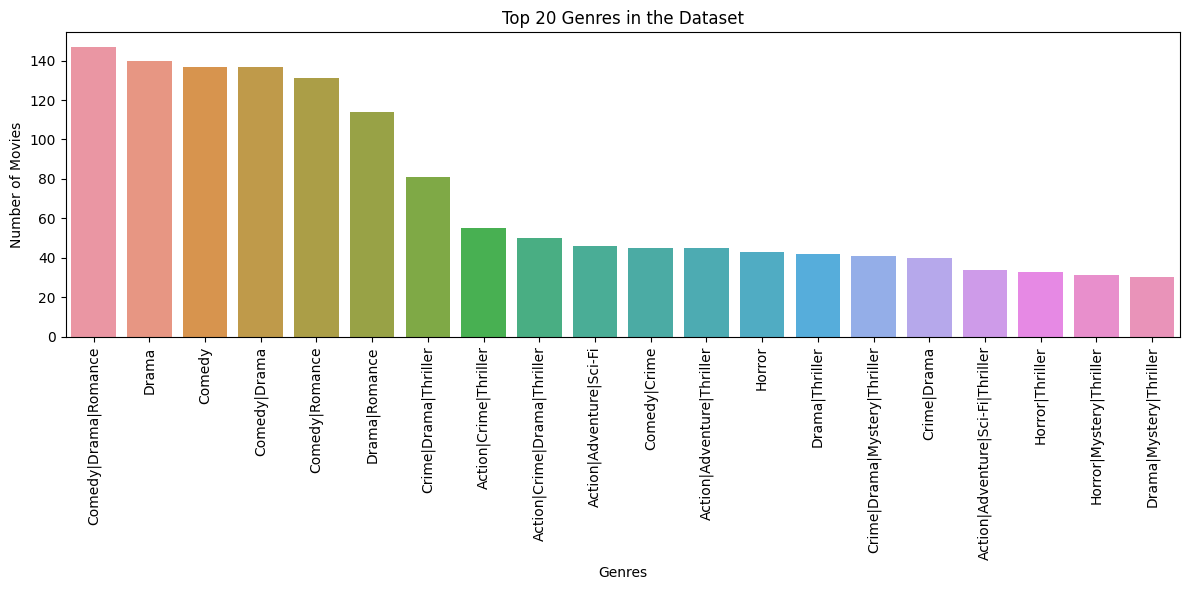

In [544]:
# Count occurrences of each genre and select the top 20 & convert the series to a DataFrame
count_genres = movie_data['genres'].value_counts().nlargest(20).reset_index(name='counts')
count_genres_f = movie_data.join(count_genres)
# Plotting the bar graph using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=count_genres, x='index', y='counts')
plt.title("Top 20 Genres in the Dataset")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [545]:
# Sort the DataFrame by profit_percent in descending order to get the top 20 profitable movies
top20_profit_movies = movie_data.sort_values(by="profit_percent", ascending=False).head(20)
top20_profit_movies

,director_name,num_critic_for_reviews,imdb_score,country,movie_title,budget,budget_million,gross,gross_million,genres,actor_1_name,profit,profit_percent,title_year,num_voted_users,num_user_for_reviews,duration,language
3649,Oren Peli,409,6.3,USA,Paranormal Activity,15000.0,0.015000,107917283.0,107.917283,Horror,Micah Sloat,107902283.0,99.986100,2007,184824,1189,84.0,English
3652,Jonathan Caouette,72,7.2,USA,Tarnation,218.0,0.000218,592014.0,0.592014,Biography|Documentary,Greg Ayres,591796.0,99.963177,2003,5709,114,88.0,English
3611,Daniel Myrick,360,6.4,USA,The Blair Witch Project,60000.0,0.060000,140530114.0,140.530114,Horror,Heather Donahue,140470114.0,99.957305,1999,186786,3400,81.0,English
3709,Edward Burns,36,6.6,USA,The Brothers McMullen,25000.0,0.025000,10246600.0,10.246600,Comedy|Drama|Romance,Shari Albert,10221600.0,99.756017,1995,6375,36,98.0,English
3696,Tobe Hooper,277,7.5,USA,The Texas Chain Saw Massacre,83532.0,0.083532,30859000.0,30.859000,Horror|Thriller,Gunnar Hansen,30775468.0,99.729311,1974,96411,826,88.0,English
2866,Tobe Hooper,277,7.5,USA,The Texas Chain Saw Massacre,83532.0,0.083532,30859000.0,30.859000,Horror|Thriller,Gunnar Hansen,30775468.0,99.729311,1974,96410,826,88.0,English
3721,Robert Rodriguez,56,6.9,USA,El Mariachi,7000.0,0.007000,2040920.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,2033920.0,99.657017,1992,52055,130,81.0,Spanish
3699,Travis Cluff,159,4.2,USA,The Gallows,100000.0,0.100000,22757819.0,22.757819,Horror|Thriller,Pfeifer Brown,22657819.0,99.560591,2015,13521,150,81.0,English
3706,Morgan Spurlock,193,7.3,USA,Super Size Me,65000.0,0.065000,11529368.0,11.529368,Comedy|Documentary|Drama,Chemeeka Walker,11464368.0,99.436222,2004,85028,404,100.0,English
3659,John Carpenter,318,7.9,USA,Halloween,300000.0,0.300000,47000000.0,47.000000,Horror|Thriller,Jamie Lee Curtis,46700000.0,99.361702,1978,157863,1191,101.0,English


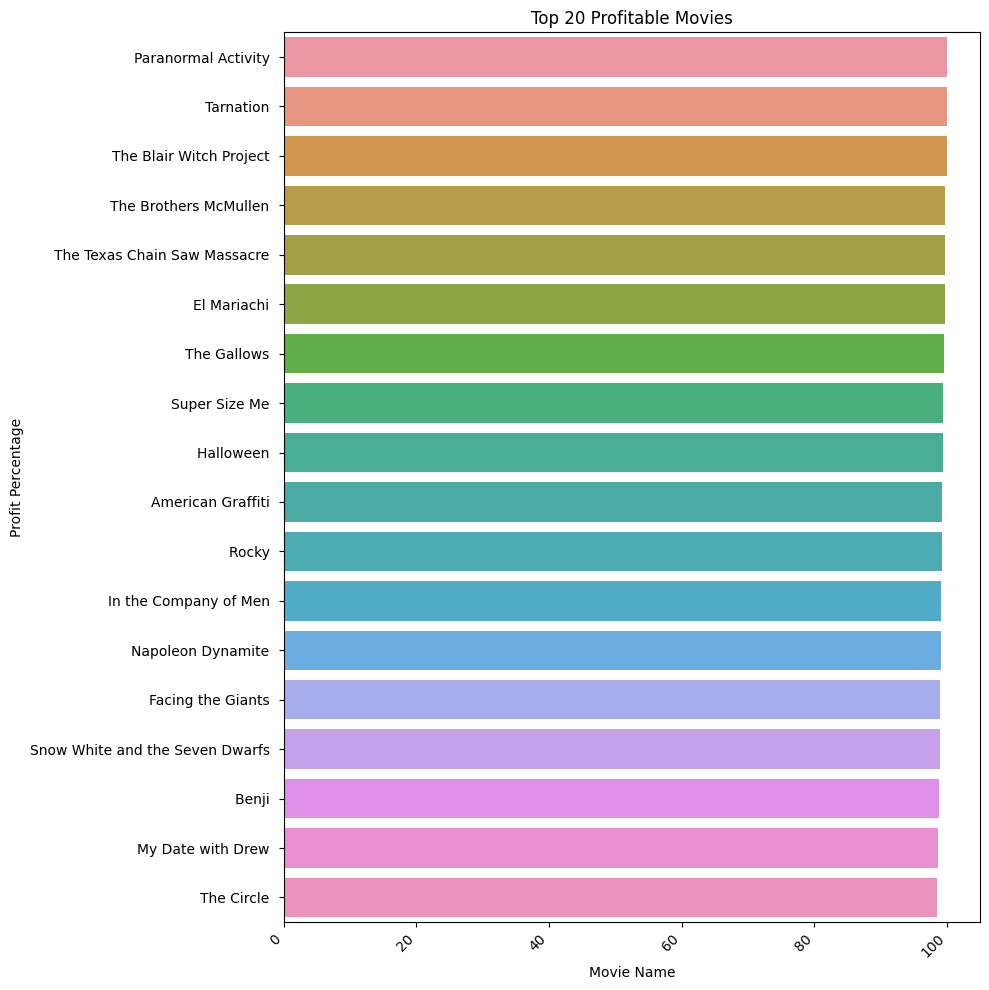

In [546]:
# Plotting the bar graph
plt.figure(figsize=(10, 10))
sns.barplot(data = movie_data, y=top20_profit_movies["movie_title"], x=top20_profit_movies["profit_percent"])
plt.title("Top 20 Profitable Movies")
plt.xlabel("Movie Name")
plt.ylabel("Profit Percentage")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Lets check the distributions with respect to IMDB score

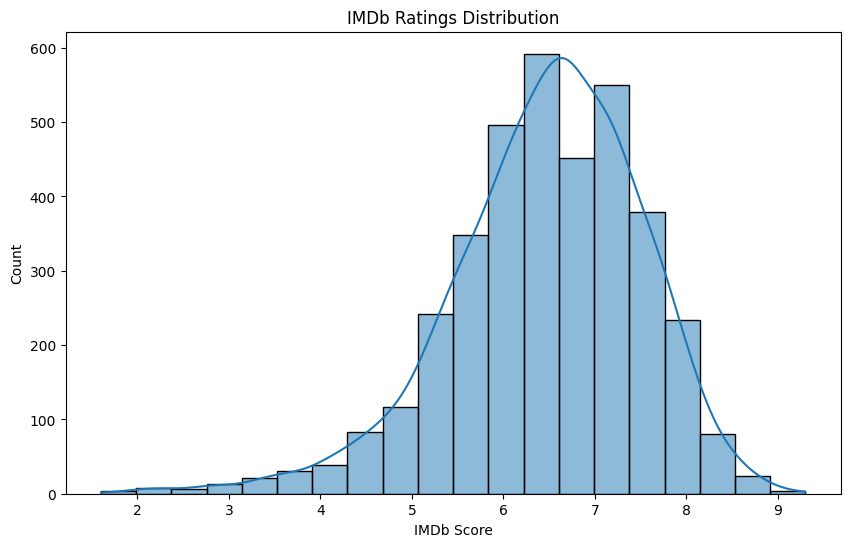

In [547]:
# Distribution of IMDb ratings for successful and unsuccessful movies
plt.figure(figsize=(10, 6))
sns.histplot(x='imdb_score', data=movie_ds, bins=20, kde=True)
plt.title('IMDb Ratings Distribution')
plt.xlabel('IMDb Score') #set x label of the plot
plt.ylabel('Count') #set y label of the plot
plt.show()

Let's create a box plot for the majority of the nations where movies have been produced or released. It reveals clearly that many films are released in the United States.

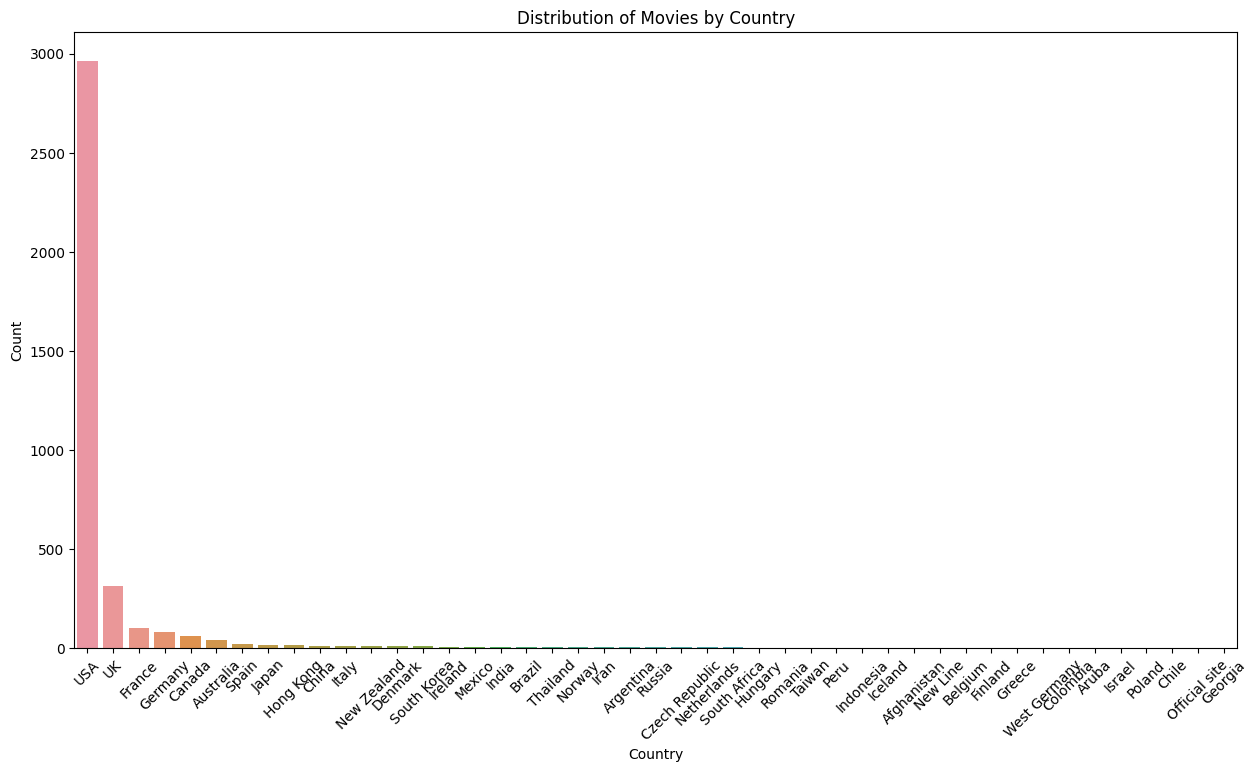

In [548]:
# Bar plot for country distribution
plt.figure(figsize=(15, 8))
sns.countplot(x='country', data=movie_data, order=movie_data['country'].value_counts().index)
plt.title('Distribution of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

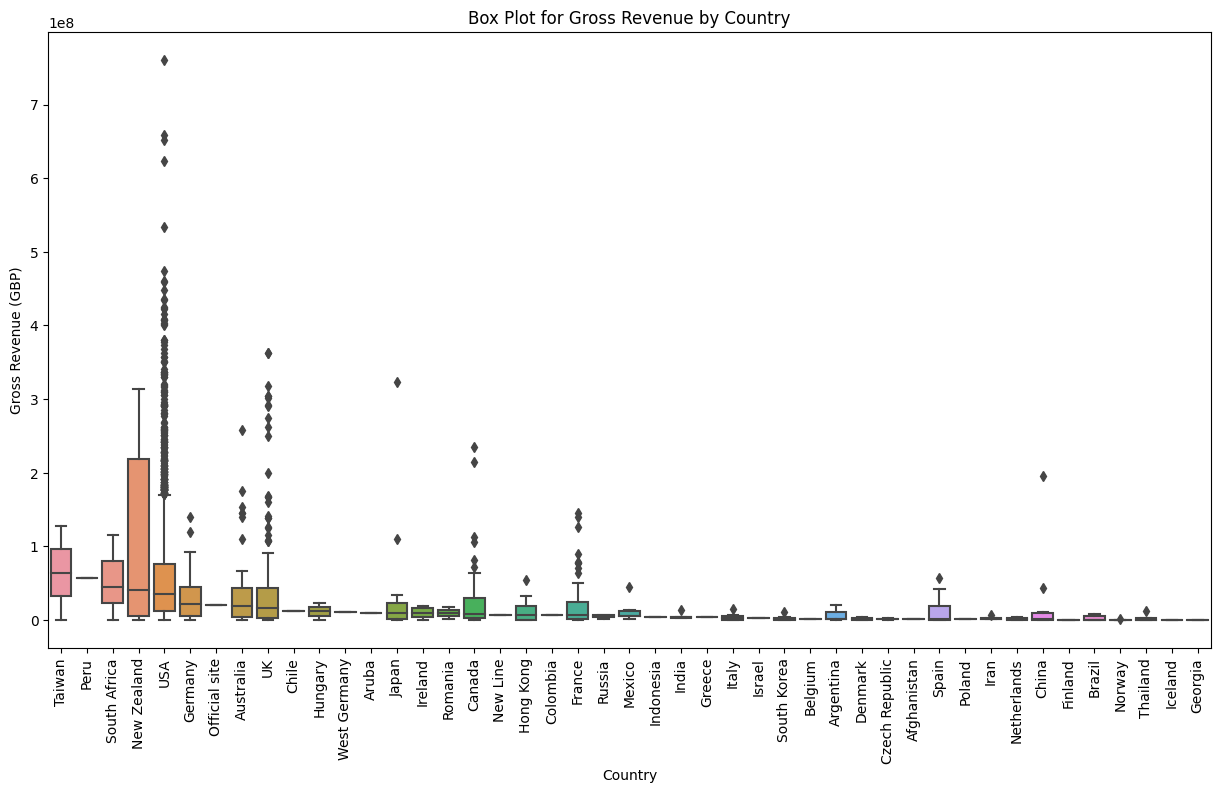

In [549]:
# Box plot for gross revenue by country
plt.figure(figsize=(15, 8))
sns.boxplot(x='country', y='gross', data=movie_data, order=movie_data.groupby('country')['gross'].median().sort_values(ascending=False).index)
plt.title('Box Plot for Gross Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Gross Revenue (GBP)')
plt.xticks(rotation=90)
plt.show()

I find the director of the film to be very important as we being the viewers see movies from a particular viewpoint of the filmmaker. To find out which movie has made the most money to date, I'm going to put the filmmakers and genres into groups.

In [550]:
# Grouping with director and genres to go further into analysis
director_group = movie_data.groupby(['director_name', 'genres'])[['imdb_score', 'budget_million', 'gross_million', 'profit_percent', 'genres']].mean()

# Minimum IMDb score since most of them lies between 5 and 8 and maximum budget conditions
min_imdb_score = 5.5
max_budget = 1.5

# Filtering movies with positive gross revenue
top_rated_director = director_group[director_group['gross_million'] > 0.0]

# Applying conditions for budget
top_rated_director = top_rated_director[(top_rated_director['budget_million']) <= max_budget]

# Filtering movies with positive budget
top_pb_director = top_rated_director[(top_rated_director['budget_million']) > 0.0]

# Sorting the dataset by maximum revenue generated by director in a particular genre
top_pb_director = top_pb_director.sort_values('gross_million', ascending=False)

# Applying the condition for IMDb score
top_imdb_director = top_pb_director[top_pb_director['imdb_score'] > min_imdb_score]

# Print the result for analysis
top_imdb_director.head(10)

,,imdb_score,budget_million,gross_million,profit_percent
director_name,genres,,,,
Daniel Myrick,Horror,6.4,0.060000,140.530114,99.957305
John G. Avildsen,Drama|Sport,8.1,0.960000,117.235247,99.181134
George Lucas,Comedy|Drama|Music,7.5,0.777000,115.000000,99.324348
Oren Peli,Horror,6.3,0.015000,107.917283,99.986100
James Wan,Fantasy|Horror|Mystery|Thriller,6.8,1.500000,53.991137,97.221766
John Carpenter,Horror|Thriller,7.9,0.300000,47.000000,99.361702
Jared Hess,Comedy,6.9,0.400000,44.540956,99.101950
Joe Camp,Adventure|Family|Romance,6.1,0.500000,39.552600,98.735861
Alex Kendrick,Drama|Romance,6.5,0.500000,33.451479,98.505298


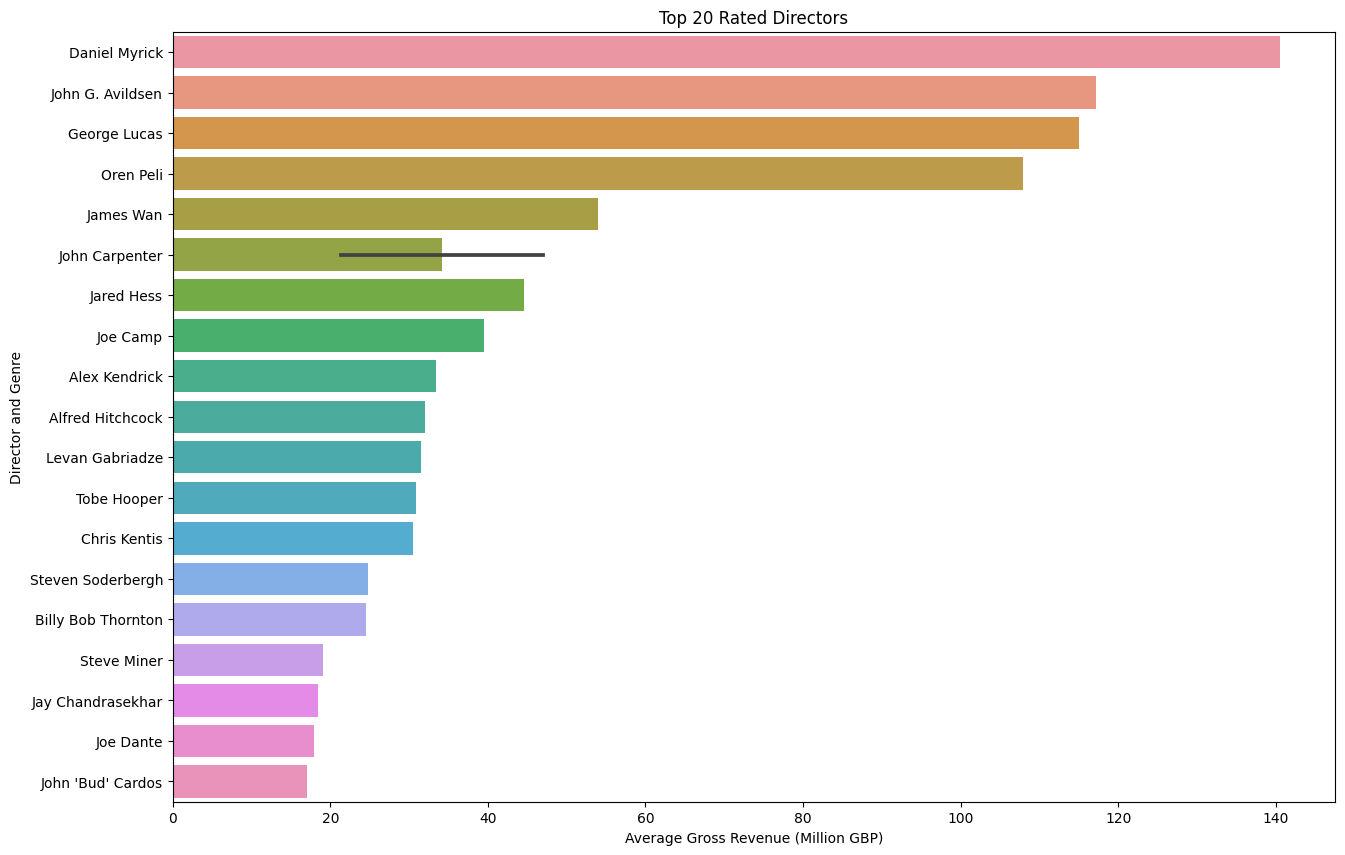

In [551]:
# Plotting the top 20 directors
top20_imdb_director = top_imdb_director.head(20)

plt.figure(figsize=(15, 10))
sns.barplot(x='gross_million', y=top20_imdb_director.index.get_level_values('director_name'), data=top20_imdb_director)
plt.title('Top 20 Rated Directors')
plt.xlabel('Average Gross Revenue (Million GBP)')
plt.ylabel('Director and Genre')
plt.show()

The list indicates that the horror, Drama|Sport, Comedy|Drama|Music genre is the most well-liked, so let's get the list of filmmakers who primarily has released movies in this genre.

In [552]:
# get the list of most liked genre
genre_list = movie_data[movie_data['genres'].str.contains('Horror',case=False)]

# Gross should be more than 0
genre_list1 = genre_list[genre_list['gross_million'] > 0.0]

# Applying the condition for Budget
genre_list1 = genre_list[(genre_list['budget_million']) <= max_budget]

# Budget should be more than 0
genre_list2 = genre_list1[(genre_list1['budget_million']) > 0.0]

# Arranging the data set in terms of maximum revenue generated by director in a particular genre
genre_list3 = genre_list2.sort_values('gross_million', ascending=False)

# Applying the condition for IMDB
genre_list4 = genre_list3[genre_list3['imdb_score'] > min_imdb_score]


genre_list4.reset_index(drop=True,inplace=True)
genre_list4

,director_name,num_critic_for_reviews,imdb_score,country,movie_title,budget,budget_million,gross,gross_million,genres,actor_1_name,profit,profit_percent,title_year,num_voted_users,num_user_for_reviews,duration,language
0,Daniel Myrick,360,6.4,USA,The Blair Witch Project,60000.0,0.060000,140530114.0,140.530114,Horror,Heather Donahue,140470114.0,99.957305,1999,186786,3400,81.0,English
1,Oren Peli,409,6.3,USA,Paranormal Activity,15000.0,0.015000,107917283.0,107.917283,Horror,Micah Sloat,107902283.0,99.986100,2007,184824,1189,84.0,English
2,James Wan,287,7.7,USA,Saw,1200000.0,1.200000,55153403.0,55.153403,Horror|Mystery|Thriller,Michael Emerson,53953403.0,97.824250,2004,299127,1509,103.0,English
3,James Wan,445,6.8,USA,Insidious,1500000.0,1.500000,53991137.0,53.991137,Fantasy|Horror|Mystery|Thriller,Lin Shaye,52491137.0,97.221766,2010,202800,752,103.0,English
4,John Carpenter,318,7.9,USA,Halloween,300000.0,0.300000,47000000.0,47.000000,Horror|Thriller,Jamie Lee Curtis,46700000.0,99.361702,1978,157863,1191,101.0,English
5,John Carpenter,318,7.9,USA,Halloween,300000.0,0.300000,47000000.0,47.000000,Horror|Thriller,Jamie Lee Curtis,46700000.0,99.361702,1978,157857,1191,101.0,English
6,Alfred Hitchcock,290,8.5,USA,Psycho,806947.0,0.806947,32000000.0,32.000000,Horror|Mystery|Thriller,Janet Leigh,31193053.0,97.478291,1960,422432,1040,108.0,English
7,Levan Gabriadze,270,5.7,USA,Unfriended,1000000.0,1.000000,31537320.0,31.537320,Horror|Mystery|Thriller,Shelley Hennig,30537320.0,96.829154,2014,44329,309,83.0,English
8,Tobe Hooper,277,7.5,USA,The Texas Chain Saw Massacre,83532.0,0.083532,30859000.0,30.859000,Horror|Thriller,Gunnar Hansen,30775468.0,99.729311,1974,96410,826,88.0,English
9,Tobe Hooper,277,7.5,USA,The Texas Chain Saw Massacre,83532.0,0.083532,30859000.0,30.859000,Horror|Thriller,Gunnar Hansen,30775468.0,99.729311,1974,96411,826,88.0,English


### Hypothesis
Lets do the Hypothesis

Based on the EDA below are my hypothesis

Hypothesis 1: The average gross profit percentage of movies produced in the United States is not significantly different from the average gross profit percentage of movies produced in UK.

H0 : U_usa = U_uk

H1 : U_usa > U_uk


In [560]:
df_boot = movie_data.copy(deep=True)
# Define the means, variances, and sample sizes for both groups
m_usa = df_boot[df_boot["country"] == 'USA']["profit_percent"].mean()
m_uk = df_boot[df_boot["country"] == 'UK']["profit_percent"].mean()
v_usa = df_boot[df_boot["country"] == 'USA']["profit_percent"].var(ddof=1)
v_uk = df_boot[df_boot["country"] == 'UK']["profit_percent"].var(ddof=1)
n_usa = df_boot[df_boot["country"] == 'USA']["profit_percent"].count()
n_uk = df_boot[df_boot["country"] == 'UK']["profit_percent"].count()

# Calculate the observed t-statistic
se = np.sqrt(v_usa/n_usa + v_uk/n_uk)
t_stat_observed = (m_usa - m_uk) / se

# Combine means for shifting
comb_m = (df_boot[df_boot["country"] == 'USA']["profit_percent"].sum() +
          df_boot[df_boot["country"] == 'UK']["profit_percent"].sum()) / (n_usa + n_uk)

# Shift the datasets so they have equal means
df_boot["USAa"] = df_boot[df_boot["country"] == 'USA']["profit_percent"] - m_usa + comb_m
df_boot["UKa"] = df_boot[df_boot["country"] == 'UK']["profit_percent"] - m_uk + comb_m

# Bootstrap samples and calculate the difference in means for each sample
num_bootstraps = 1000
count = 0

for _ in range(num_bootstraps):
    bs_1 = np.array([df_boot["USAa"].iloc[i] for i in np.random.randint(0, n_usa, size=n_usa)])
    bs_2 = np.array([df_boot["UKa"].iloc[i] for i in np.random.randint(0, n_uk, size=n_uk)])

    bs_m_1 = np.mean(bs_1)
    bs_m_2 = np.mean(bs_2)
    bs_v_1 = np.var(bs_1, ddof=1)
    bs_v_2 = np.var(bs_2, ddof=1)
    bs_se = np.sqrt(bs_v_1/n_usa + bs_v_2/n_uk)

    bs_t_stat = (bs_m_1 - bs_m_2) / bs_se

    if np.abs(bs_t_stat) >= np.abs(t_stat_observed):
        count += 1

# Calculate p-value
p_value = (count + 1) / (num_bootstraps + 1)

# Print results
print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {m_usa - m_uk:.4f} given the underlying difference of means is 0")


There is a probability of 0.0010 that the observed difference of mean being different to 1680.5193 given the underlying difference of means is 0


With a p-value of 0.0010, the result is statistically significant. This means that we reject the null hypothesis. There is enough evidence to suggest that the average gross profit percentage of movies produced in the United States is significantly different from the average gross profit percentage of movies produced in the United Kingdom. The observed difference of 1680.5193 is considered unlikely, leading to the rejection of the null hypothesis in favor of the alternative hypothesis.

# Practical Suggestions
Lastly, we applied several processing techniques—such as wrangling, restructuring, and cleansing—to the IMDB Movies dataset, which has 27 variables and about 5000 items. After inspecting the data, we performed an explanatory data analysis and arrived at some conclusions, including some testing of hypotheses.

I searched the IMDB movies dataset for appropriate movies that had a budget under 1.5 million GBP but made more money than this. I studied the correlations between a number of variables, such as "budget" and "gross," and the terms "language," "country," "director," and "genre."

"English" did well in addition to the countries, but all other languages did not pass the test, even though they seemed to have a good return during the EDA phase. I found that "horror" films produced a reasonable return on their initial investment and met budgetary criteria.

This study bases its conclusions on a film that has a satisfactory budget of less than 1.5 million GBP and conducts separate statistical significance tests for each category variable. I would advise the production company to work with James Wan to create an English-language horror film for release in the US, based on my data analysis and hypothesis testing.